I'm going to use file "optimized_crimes.csv" based on "Crime_Data_From_2010.csv" but with all needed columns as "Weekday" or "Full_Time_Occurred". Besides I'm going to use "format.pkl" file which contains dictionary with name of column as key and its type as value.

In [1]:
#import of libraries
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import datetime
import pickle

In [2]:
def load_obj( name ):
    """
    Function to load file using pickle library. Parameter is name of file without file extention.
    """
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
#here we load dictionary from file and then parse dataframe using the dictionary and parse dates
column_types = load_obj("format")
la_crimes = pd.read_csv('optimized_crimes.csv', dtype = column_types, 
                 parse_dates=['Date Reported', 'Date Occurred', 'Time Occurred', 'Full_Time_Occurred'], 
                 infer_datetime_format = True)
la_crimes.drop(['Unnamed: 0'], axis=1, inplace=True) #delete extra column appeared by parsing
la_crimes.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Full_Time_Occurred,Weekday
0,1208575,2013-03-14,2013-03-11,1900-01-01 18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,Adult Other,626.0,0.0,0.0,0.0,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",2013-03-11 18:00:00,Monday
1,102005556,2010-01-25,2010-01-22,1900-01-01 23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,VAN NESS,15TH,"(34.0454, -118.3157)",2010-01-22 23:00:00,Friday
2,418,2013-03-19,2013-03-18,1900-01-01 20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,200 E 104TH ST,NaN,"(33.942, -118.2717)",2013-03-18 20:30:00,Monday
3,101822289,2010-11-11,2010-11-10,1900-01-01 18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,88TH,WALL,"(33.9572, -118.2717)",2010-11-10 18:00:00,Wednesday
4,42104479,2014-01-11,2014-01-04,1900-01-01 23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,Invest Cont,745.0,0.0,0.0,0.0,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",2014-01-04 23:00:00,Saturday


In [4]:
la_crimes.info(memory_usage='deep') #information about columns, their types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692056 entries, 0 to 1692055
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DR Number               int64         
 1   Date Reported           datetime64[ns]
 2   Date Occurred           datetime64[ns]
 3   Time Occurred           datetime64[ns]
 4   Area ID                 category      
 5   Area Name               category      
 6   Reporting District      category      
 7   Crime Code              category      
 8   Crime Code Description  category      
 9   MO Codes                category      
 10  Victim Age              uint8         
 11  Victim Sex              category      
 12  Victim Descent          category      
 13  Premise Code            category      
 14  Premise Description     category      
 15  Weapon Used Code        category      
 16  Weapon Description      category      
 17  Status Code             category      
 18  St

### Упражнение

1. Стилизировать столбец таблицы общего количества преступлений по дням недели.
2. Построить распределение количества преступлений по дням недедли в зависимости от района:
 - линейна диаграмма;
 - гистограмма по дням;
 - столбчатая диаграмма накопления ( stacked bar chart);
 - площадная диаграмма (стыковачная и нестыковочная;
 - диаграмма рассеяния количества преступлений по дням недели (два графика scatter_matrix и pairplot);
 - распределение количества преступлений в любой день недели (например:пятница).
3. Анализ количества преступлений по районам:
 - гистограмма распределения количества преступлений в зависимости от района;
 - распределение количества преступлений за любой год (например: 2010 год);
 - показать через jointplot динамику изменений количества преступлений в сравнении 2010 и 2017 года;
 - годовая динамика изменения количества преступлений по районам (линейный график с легендами и удобным масштабом).
4. Анализ преступлений в заданном районе:
 - количество отдельно взятого вида преступления распределенного по дням недели;
 - построить таблицу (вид преступления по дням недели) и подсветить максимальные и минимальные значения для каждого вида преступления разным цветом;
 - сравнение распределения 20 наиболее часто встречающихся преступлений по дня недели для заданного района (показать через boxplot);
 - проанализировать коэфициент корреляции вида преступления и дня недели (результат в виде heatmap на которой отображено только корреляция вида преступления от дня недели)
 - линейный график коэффициент корреляции дня недели и вида преступления в абсолютных значениях.
5. Сравнение количества преступлений по дням недели и районам:
 - построить линейный график для трех любых районов;
 - построить линейный график для всех районов сразу.
6. Доля преступлений в конкретном районе от общего количества:
 - Bar график для всех районов по всей статистики;
 - Bar график для всех районов по годам.
7. box график статистики всех преступлений в распределении по годам.   
8. Интерактивный график:
 - количество преступлений от дня недели для отдельного района;
 - количество преступлений от района для от дельного дня недели.

In [5]:
#make weekdays' categories ordered
la_crimes['Weekday'] = pd.Categorical(la_crimes['Weekday'], 
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                      ordered = True)

**1. Стилизировать столбец таблицы общего количества преступлений по дням недели.**

In [6]:
#create new dataframe with weekdays as rows
crimes_by_weekdays = pd.DataFrame(la_crimes['Weekday'].value_counts().values, 
                                  index = la_crimes['Weekday'].value_counts().index, 
                                  columns = ['Frequency_by_weekdays'])
crimes_by_weekdays.style.bar(color = '#16f4b2')

,Frequency_by_weekdays
Friday,261154
Saturday,243302
Monday,241094
Wednesday,239585
Thursday,237834
Tuesday,236998
Sunday,232089


**2.1. Построить распределение количества преступлений по дням недели в зависимости от района: линейная диаграмма;**

In [7]:
#create pivate table and check if it's correct
df_task2 = la_crimes.pivot_table('Full_Time_Occurred',index='Area Name',columns='Weekday',aggfunc='count')
df_task2.head()

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Area Name,,,,,,,
77th Street,17163,16480,16749,16127,17625,16825,16791
Central,10060,9965,9908,10205,11220,11275,10192
Devonshire,11149,11162,11327,11383,12834,10891,10043
Foothill,9333,8969,9236,8959,10158,9208,8969
Harbor,10509,10354,10555,10499,11753,11081,10452


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

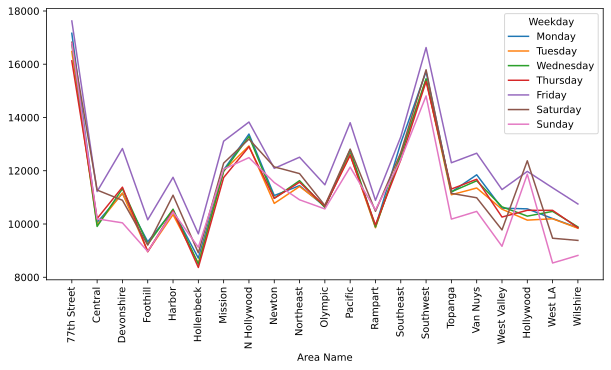

In [8]:
df_task2.plot(rot = 90, figsize=(10, 5))
plt.xticks(range(0, len(df_task2.index)), df_task2.index)
plt.grid

**2.2. Построить распределение количества преступлений по дням недели в зависимости от района: гистограмма по дням;**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1CD987FA0>,
      dtype=object)

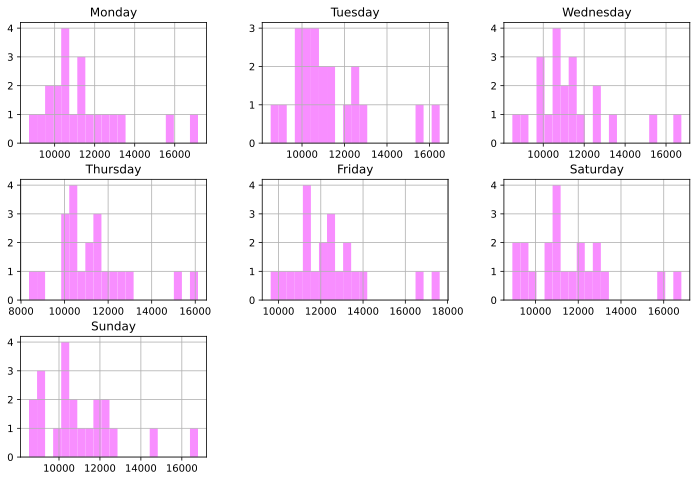

In [9]:
df_task2.hist(figsize = (12, 8), column = df_task2.columns, bins = len(df_task2.index), color = '#f88eff')

**2.3. Построить распределение количества преступлений по дням недели в зависимости от района: столбчатая диаграмма накопления (stacked bar chart);**

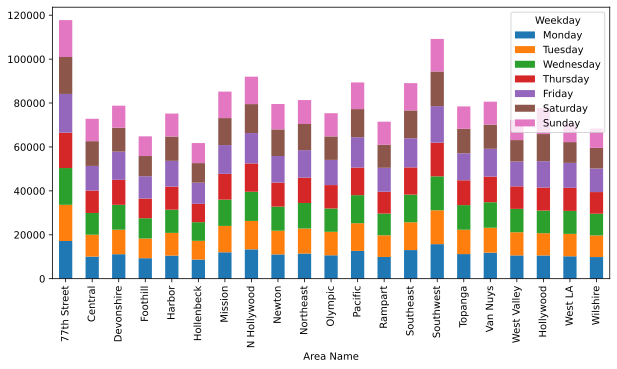

In [10]:
df_task2.plot(kind='bar', rot=90, figsize=(10, 5), stacked=True);

**2.4. Построить распределение количества преступлений по дням недели в зависимости от района: площадная диаграмма (стыковачная и нестыковочная;**

([<matplotlib.axis.XTick at 0x1d1c6757550>,
 [Text(0, 0, '77th Street'),
  Text(0, 0, 'Central'),
  Text(0, 0, 'Devonshire'),
  Text(0, 0, 'Foothill'),
  Text(0, 0, 'Harbor'),
  Text(0, 0, 'Hollenbeck'),
  Text(0, 0, 'Mission'),
  Text(0, 0, 'N Hollywood'),
  Text(0, 0, 'Newton'),
  Text(0, 0, 'Northeast'),
  Text(0, 0, 'Olympic'),
  Text(0, 0, 'Pacific'),
  Text(0, 0, 'Rampart'),
  Text(0, 0, 'Southeast'),
  Text(0, 0, 'Southwest'),
  Text(0, 0, 'Topanga'),
  Text(0, 0, 'Van Nuys'),
  Text(0, 0, 'West Valley'),
  Text(0, 0, 'Hollywood'),
  Text(0, 0, 'West LA'),
  Text(0, 0, 'Wilshire')])

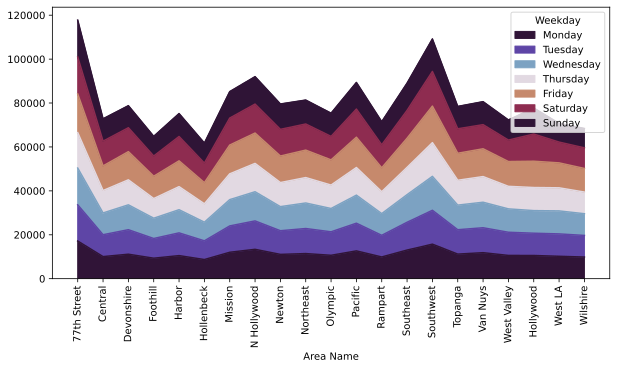

In [11]:
#staked
df_task2.plot(kind='area', rot=90, figsize=(10, 5), colormap='twilight_shifted', stacked=True)
plt.xticks(range(0, len(df_task2.index)), df_task2.index)

([<matplotlib.axis.XTick at 0x1d1c26f87f0>,
 [Text(0, 0, '77th Street'),
  Text(0, 0, 'Central'),
  Text(0, 0, 'Devonshire'),
  Text(0, 0, 'Foothill'),
  Text(0, 0, 'Harbor'),
  Text(0, 0, 'Hollenbeck'),
  Text(0, 0, 'Mission'),
  Text(0, 0, 'N Hollywood'),
  Text(0, 0, 'Newton'),
  Text(0, 0, 'Northeast'),
  Text(0, 0, 'Olympic'),
  Text(0, 0, 'Pacific'),
  Text(0, 0, 'Rampart'),
  Text(0, 0, 'Southeast'),
  Text(0, 0, 'Southwest'),
  Text(0, 0, 'Topanga'),
  Text(0, 0, 'Van Nuys'),
  Text(0, 0, 'West Valley'),
  Text(0, 0, 'Hollywood'),
  Text(0, 0, 'West LA'),
  Text(0, 0, 'Wilshire')])

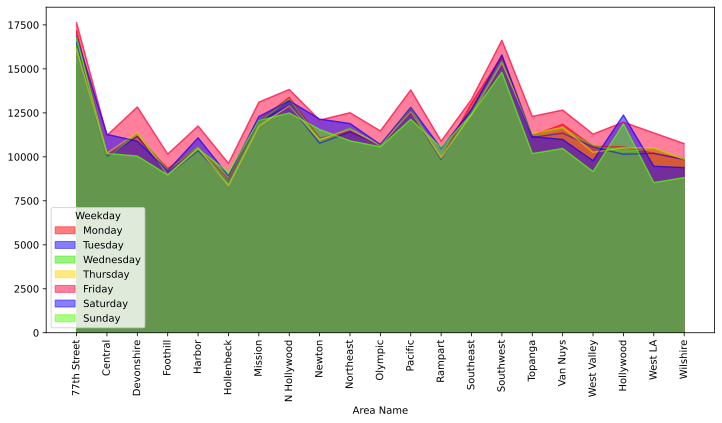

In [12]:
#unstaked
df_task2.plot(kind='area', rot=90, figsize=(12, 6), colormap = 'prism', stacked=False)
plt.xticks(range(0, len(df_task2.index)), df_task2.index)

**2.5. Построить распределение количества преступлений по дням недели в зависимости от района: диаграмма рассеяния количества преступлений по дням недели (два графика scatter_matrix и pairplot);**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1FBDC6460>,
      dtype=object)

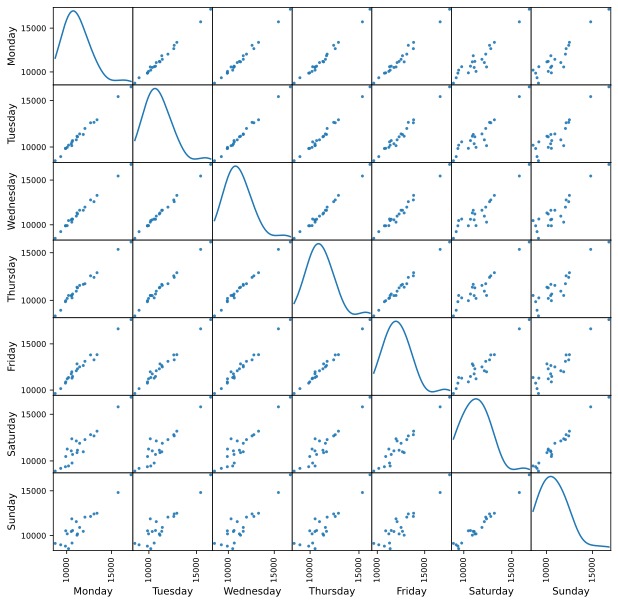

In [13]:
#scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_task2, alpha=0.9, figsize=(10, 10), diagonal='kde')

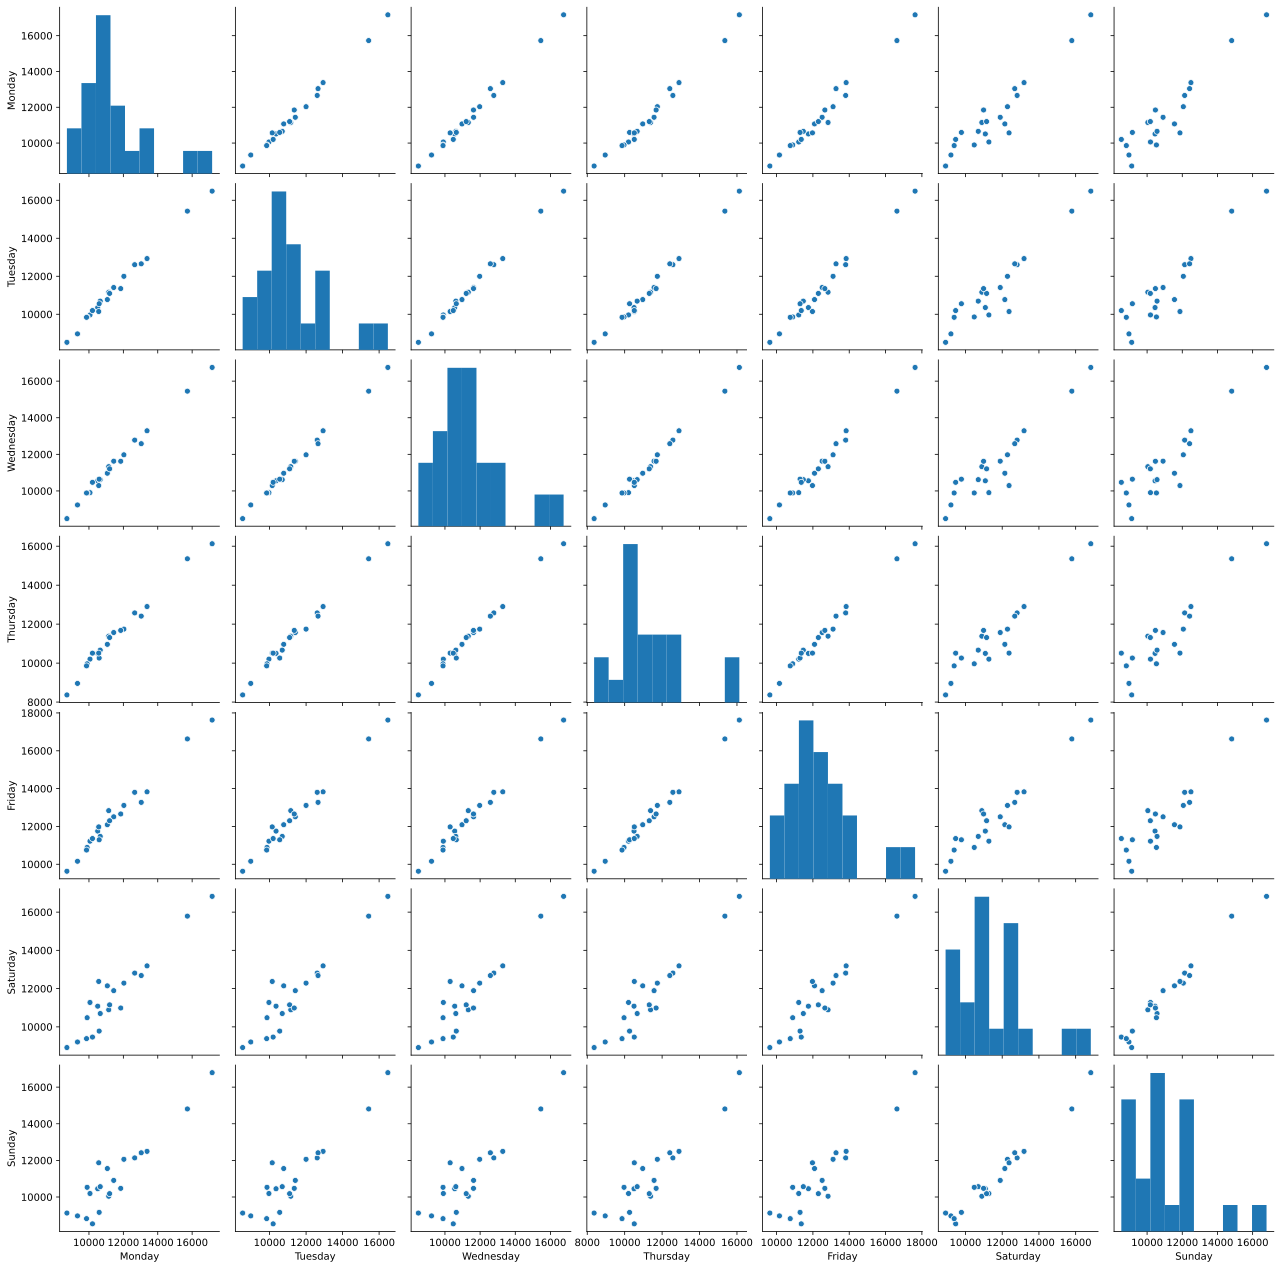

In [14]:
#pairplot
import seaborn as sns
sns_plot = sns.pairplot(df_task2);

**2.6. Построить распределение количества преступлений по дням недели в зависимости от района: распределение количества преступлений в любой день недели (например: пятница).**

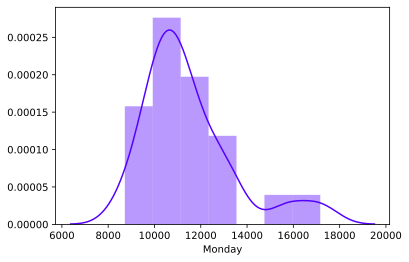

In [15]:
weekday = 'Monday'
sns.distplot(df_task2[weekday], color = '#5400fe')

**3.1. Анализ количества преступлений по районам: гистограмма распределения количества преступлений в зависимости от района;**

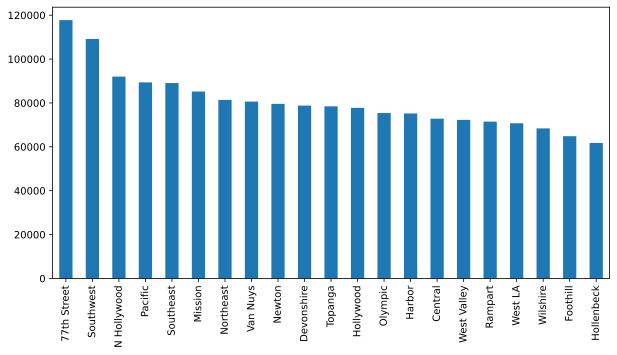

In [16]:
#here we get data  from source dataframe
la_crimes['Area Name'].value_counts().plot(kind = 'bar', figsize=(10, 5))

**3.2. Анализ количества преступлений по районам: распределение количества преступлений за любой год (например: 2010 год);**

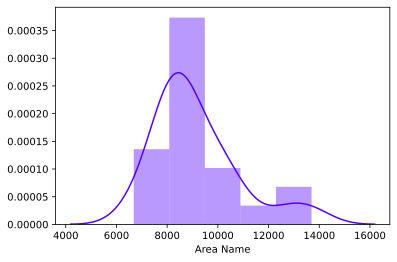

In [17]:
#year 2013, check only 2013-year entries and the sum them up
year_to_check = '2013'
sns.distplot(la_crimes['Area Name'][la_crimes['Full_Time_Occurred'].dt.strftime('%Y')==year_to_check].value_counts(), 
             color = '#5400fe')

**3.3. Анализ количества преступлений по районам: показать через jointplot динамику изменений количества преступлений в сравнении 2010 и 2017 года;**

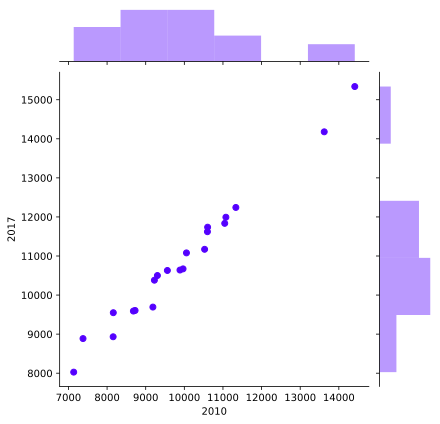

In [18]:
#here I used the same method as in previous task
plot_task_3_3 = sns.jointplot(x=la_crimes['Area Name'][la_crimes['Full_Time_Occurred'].dt.strftime('%Y')=='2010'].value_counts(),
              y=la_crimes['Area Name'][la_crimes['Full_Time_Occurred'].dt.strftime('%Y')=='2017'].value_counts(),
              data=la_crimes, kind='scatter', color = '#5400fe')
plot_task_3_3.set_axis_labels('2010', '2017')
plt.show()

**3.4. Анализ количества преступлений по районам: годовая динамика изменения количества преступлений по районам (линейный график с легендами и удобным масштабом).**

In [19]:
#for this task we need new dataframe with years as columns and areas as rows
df_task3 = la_crimes.pivot_table('Full_Time_Occurred', index=la_crimes['Full_Time_Occurred'].dt.strftime('%Y'),
                                 columns='Area Name', aggfunc='count')
df_task3

Area Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Mission,N Hollywood,Newton,Northeast,...,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West Valley,Hollywood,West LA,Wilshire
Full_Time_Occurred,,,,,,,,,,,,,,,,,,,,,
2010,14413,7136,10603,9303,9561,7377,10525,11334,9967,10598,...,11076,8681,11046,13622,9887,10055,9225,9186,8157,8161
2011,14220,7162,9612,8481,9815,6519,10501,10672,9328,9813,...,10364,8409,11027,12897,9091,9495,8811,9232,8589,8258
2012,14254,8071,9392,7898,9402,7052,10532,11235,8864,9825,...,10296,8569,10559,13078,8899,9611,8978,9296,8572,8027
2013,13696,7574,8637,7446,8387,6681,10231,10896,8598,9247,...,10085,8114,10153,12674,9054,9340,8355,8516,8143,7805
2014,14006,8352,8602,7091,8262,6883,9879,10346,9179,9646,...,10720,8518,10511,12922,8739,9411,7880,8521,8160,7886
2015,14572,10257,9982,7652,9486,7980,10572,11739,9601,10228,...,11678,9232,11062,13790,9853,10438,8632,9748,9664,8275
2016,15313,10812,10283,7865,9488,9116,10955,11971,10978,10324,...,11726,9141,11426,14088,10927,10397,9569,10530,9331,8999
2017,15338,11836,10501,8028,9591,8933,10671,12243,11622,10381,...,11993,9549,11738,14179,10641,10630,9606,11172,8887,9693
2018,1948,1625,1177,1068,1211,1230,1341,1575,1428,1293,...,1437,1291,1539,1935,1363,1241,1233,1538,1241,1297


Text(0, 0.5, 'Amount of crimes')

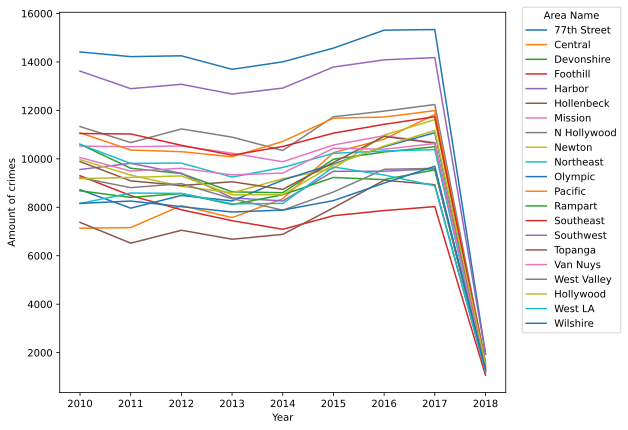

In [20]:
#here we just crete plot and set parameters of plot and legend
df_task3.plot(figsize = (8, 7))
plt.legend(bbox_to_anchor=(0.92, 0.9), bbox_transform=plt.gcf().transFigure, title = 'Area Name') #to place legent out of plot
plt.xlabel('Year')
plt.ylabel('Amount of crimes')

**4.1. Анализ преступлений в заданном районе: количество отдельно взятого вида преступления распределенного по дням недели;**

In [21]:
#at first we need to create new dataframe of crimes in certain district
district_name = 'Southeast'
la_crimes_for_certain_district = la_crimes[la_crimes['Area Name'] == district_name]

In [22]:
#new dataframe with amount of crimes (of different types) by weekday in selected dstrict
df_task4 = la_crimes_for_certain_district.pivot_table('Full_Time_Occurred',  
                                                      index='Weekday',
                                                      columns='Crime Code Description',
                                                      aggfunc='count')
df_task4

Crime Code Description,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065",BIKE - STOLEN,...,DOCUMENT WORTHLESS ($200 & UNDER),INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),LEWD/LASCIVIOUS ACTS WITH CHILD,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059",SEXUAL PENETRATION W/FOREIGN OBJECT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,TRAIN WRECKING,FIREARMS RESTRAINING ORDER (FIREARMS RO)
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,37.0,18.0,864.0,124.0,1434.0,NaN,21.0,50.0,1.0,1.0,...,NaN,NaN,NaN,4.0,1.0,3.0,1.0,NaN,NaN,NaN
Tuesday,33.0,7.0,841.0,115.0,1371.0,3.0,36.0,40.0,NaN,1.0,...,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN
Wednesday,25.0,12.0,767.0,106.0,1410.0,NaN,33.0,60.0,NaN,2.0,...,1.0,NaN,NaN,1.0,1.0,2.0,1.0,1.0,NaN,1.0
Thursday,34.0,21.0,823.0,106.0,1320.0,1.0,41.0,37.0,NaN,2.0,...,NaN,NaN,NaN,1.0,NaN,4.0,2.0,NaN,1.0,NaN
Friday,39.0,12.0,878.0,100.0,1373.0,2.0,46.0,37.0,1.0,2.0,...,1.0,NaN,2.0,1.0,3.0,7.0,1.0,NaN,NaN,NaN
Saturday,41.0,19.0,1034.0,74.0,1321.0,3.0,30.0,38.0,NaN,1.0,...,NaN,NaN,NaN,1.0,2.0,8.0,NaN,NaN,NaN,NaN
Sunday,36.0,16.0,1046.0,91.0,1344.0,NaN,22.0,30.0,NaN,5.0,...,NaN,1.0,NaN,NaN,3.0,7.0,NaN,1.0,NaN,NaN


Text(0, 0.5, 'Amount of crimes')

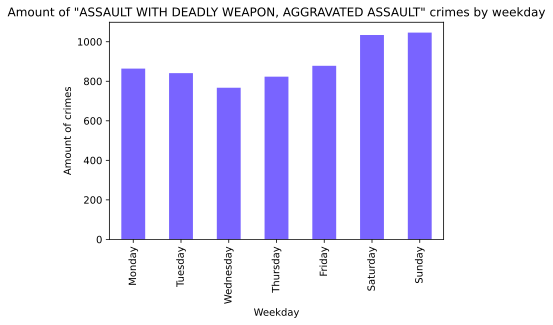

In [23]:
#plot for trespassing 
type_of_crime = 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
df_task4[type_of_crime].plot(kind='bar', title='Amount of "' + type_of_crime + '" crimes by weekday', color='#7964ff')
plt.ylabel('Amount of crimes')

**4.2. Анализ преступлений в заданном районе: построить таблицу (вид преступления по дням недели) и подсветить максимальные и минимальные значения для каждого вида преступления разным цветом;**

In [24]:
#we created this table in previous task, so let's highlight values
#at first we need functions 
def highlight_max(s):
    """
    highlight the maximum in a Series yellow.
    """
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    """
    highlight the minimum in a Series gray.
    """
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [25]:
#then we create temporary dataframe and sequentially apply functions of highlighting
tmp = df_task4.style.apply(highlight_max)
tmp.apply(highlight_min)

Crime Code Description,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065",BIKE - STOLEN,BOAT - STOLEN,BOMB SCARE,BRANDISH WEAPON,BRIBERY,"BUNCO, ATTEMPT","BUNCO, GRAND THEFT","BUNCO, PETTY THEFT",BURGLARY,BURGLARY FROM VEHICLE,"BURGLARY FROM VEHICLE, ATTEMPTED","BURGLARY, ATTEMPTED",CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,CHILD ANNOYING (17YRS & UNDER),CHILD NEGLECT (SEE 300 W.I.C.),CHILD STEALING,CONTRIBUTING,COUNTERFEIT,"CREDIT CARDS, FRAUD USE ($950 & UNDER","CREDIT CARDS, FRAUD USE ($950.01 & OVER)",CRIMINAL HOMICIDE,CRIMINAL THREATS - NO WEAPON DISPLAYED,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060,CRUELTY TO ANIMALS,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER","DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",DISCHARGE FIREARMS/SHOTS FIRED,DISHONEST EMPLOYEE - GRAND THEFT,DISHONEST EMPLOYEE - PETTY THEFT,DISRUPT SCHOOL,DISTURBING THE PEACE,DOCUMENT FORGERY / STOLEN FELONY,DOCUMENT WORTHLESS ($200.01 & OVER),DRIVING WITHOUT OWNER CONSENT (DWOC),DRUNK ROLL,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)","EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",EXTORTION,FAILURE TO DISPERSE,FAILURE TO YIELD,FALSE IMPRISONMENT,FALSE POLICE REPORT,ILLEGAL DUMPING,INDECENT EXPOSURE,INTIMATE PARTNER - AGGRAVATED ASSAULT,INTIMATE PARTNER - SIMPLE ASSAULT,KIDNAPPING,KIDNAPPING - GRAND ATTEMPT,"LETTERS, LEWD",LEWD CONDUCT,LYNCHING - ATTEMPTED,ORAL COPULATION,OTHER ASSAULT,OTHER MISCELLANEOUS CRIME,PANDERING,PEEPING TOM,PICKPOCKET,PIMPING,PROWLER,PURSE SNATCHING,PURSE SNATCHING - ATTEMPT,"RAPE, ATTEMPTED","RAPE, FORCIBLE",RECKLESS DRIVING,RESISTING ARREST,ROBBERY,"SEX, UNLAWFUL",SEXUAL PENTRATION WITH A FOREIGN OBJECT,SHOPLIFTING - ATTEMPT,SHOPLIFTING - PETTY THEFT ($950 & UNDER),SHOPLIFTING-GRAND THEFT ($950.01 & OVER),SHOTS FIRED AT INHABITED DWELLING,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02,STALKING,THEFT FROM MOTOR VEHICLE - ATTEMPT,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM PERSON - ATTEMPT,THEFT OF IDENTITY,THEFT PLAIN - ATTEMPT,THEFT PLAIN - PETTY ($950 & UNDER),"THEFT, COIN MACHINE - PETTY ($950 & UNDER)","THEFT, PERSON","THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036",THREATENING PHONE CALLS/LETTERS,THROWING OBJECT AT MOVING VEHICLE,TILL TAP - PETTY ($950 & UNDER),TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING,CHILD ABANDONMENT,CONSPIRACY,CONTEMPT OF COURT,"DRUGS, TO A MINOR",GRAND THEFT / INSURANCE FRAUD,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",TELEPHONE PROPERTY - DAMAGE,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",PETTY THEFT - AUTO REPAIR,LYNCHING,"MANSLAUGHTER, NEGLIGENT",DOCUMENT WORTHLESS ($200 & UNDER),INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),LEWD/LASCIVIOUS ACTS WITH CHILD,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059",SEXUAL PENETRATION W/FOREIGN OBJECT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,TRAIN WRECKING,FIREARMS RESTRAINING ORDER (FIREARMS RO)
Weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Monday,37.000000,18.000000,864.000000,124.000000,1434.000000,nan,21.000000,50.000000,1.000000,1.000000,1.000000,5.000000,122.000000,nan,nan,9.000000,7.000000,1074.000000,627.000000,15.000000,86.000000,18.000000,102.000000,35.000000,57.000000,10.000000,nan,4.000000,1.000000,nan,48.00000

**4.3. Анализ преступлений в заданном районе: сравнение распределения 20 наиболее часто встречающихся преступлений по дням недели для заданного района (показать через boxplot);**

In [26]:
#at first we need to get the common crimes
common_crimes = la_crimes['Crime Code Description'].value_counts()[:20].index
common_crimes

CategoricalIndex(['BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE',
                  'VEHICLE - STOLEN', 'BURGLARY',
                  'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
                  'INTIMATE PARTNER - SIMPLE ASSAULT',
                  'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',
                  'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                  'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                  'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'ROBBERY',
                  'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                  'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                  'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                  'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                  'DOCUMENT FORGERY / STOLEN FELONY',
                  'OTHER MISCELLANEOUS CRIME', 'VIOLATION OF COURT ORDER',
                  'LETTERS, LEWD'],
                

In [27]:
df_task4_3 = pd.DataFrame(df_task4, columns = common_crimes)
df_task4_3

Crime Code Description,BATTERY - SIMPLE ASSAULT,BURGLARY FROM VEHICLE,VEHICLE - STOLEN,BURGLARY,THEFT PLAIN - PETTY ($950 & UNDER),THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",VANDALISM - MISDEAMEANOR ($399 OR UNDER),"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),ROBBERY,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036",CRIMINAL THREATS - NO WEAPON DISPLAYED,SHOPLIFTING - PETTY THEFT ($950 & UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),DOCUMENT FORGERY / STOLEN FELONY,OTHER MISCELLANEOUS CRIME,VIOLATION OF COURT ORDER,"LETTERS, LEWD"
Weekday,,,,,,,,,,,,,,,,,,,,
Monday,1434.0,627.0,1174.0,1074.0,647.0,554.0,1096.0,431.0,772.0,864.0,357.0,1023.0,252.0,476.0,22.0,85.0,95.0,96.0,118.0,96.0
Tuesday,1371.0,594.0,1222.0,1019.0,668.0,462.0,1002.0,489.0,712.0,841.0,379.0,962.0,248.0,415.0,27.0,55.0,94.0,156.0,118.0,89.0
Wednesday,1410.0,604.0,1238.0,1024.0,639.0,441.0,1018.0,430.0,749.0,767.0,366.0,907.0,268.0,449.0,27.0,78.0,78.0,161.0,126.0,78.0
Thursday,1320.0,557.0,1190.0,1044.0,599.0,476.0,998.0,422.0,767.0,823.0,397.0,924.0,249.0,427.0,25.0,67.0,88.0,112.0,123.0,69.0
Friday,1373.0,598.0,1273.0,1175.0,569.0,560.0,991.0,501.0,780.0,878.0,441.0,976.0,273.0,416.0,27.0,87.0,94.0,113.0,177.0,74.0
Saturday,1321.0,637.0,1324.0,870.0,584.0,319.0,1135.0,572.0,813.0,1034.0,370.0,906.0,207.0,383.0,25.0,76.0,76.0,99.0,139.0,74.0
Sunday,1344.0,629.0,1273.0,791.0,508.0,253.0,1245.0,502.0,831.0,1046.0,383.0,911.0,206.0,416.0,20.0,85.0,36.0,76.0,159.0,75.0


In [28]:
#import plotly
! pip install plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [29]:
#in cycle append boxes and then show 'em on one plot
data = []
for i in df_task4_3.index:
    data.append(go.Box(y=df_task4_3.loc[i], name=i))  
iplot(data, show_link = False)

**4.4. Анализ преступлений в заданном районе: проанализировать коэфициент корреляции вида преступления и дня недели (результат в виде heatmap на которой отображено только корреляция вида преступления от дня недели)**

In [30]:
weekday_crime_cor = la_crimes[['Crime Code Description', 'Weekday']] #get needed columns from source dataframe
weekday_crime_cor['Weekday'] = weekday_crime_cor['Weekday'].cat.codes #change names of weekdays to their numbers
df_crimes = pd.get_dummies(weekday_crime_cor['Crime Code Description']) #create dataframe with crime code descriptions as 
                                                                #columns and actual crimes as rows (here will be zeros and ones)
correlation_coefficients = df_crimes.corrwith(weekday_crime_cor['Weekday']) #check correlatin with weekdays
correlation_coefficients = pd.DataFrame(correlation_coefficients) #convert to dataframe
correlation_coefficients.rename(columns={0 : 'Correlation_Coefficient'}, inplace = True)
correlation_coefficients.head()

,Correlation_Coefficient
ABORTION/ILLEGAL,0.000515
ARSON,0.000555
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,-0.000904
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0.024617
ATTEMPTED ROBBERY,-0.000165


In [31]:
df_crimes.tail(30)

,ABORTION/ILLEGAL,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065",...,LEWD/LASCIVIOUS ACTS WITH CHILD,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059",SEXUAL PENETRATION W/FOREIGN OBJECT,BLOCKING DOOR INDUCTION CENTER,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",CHILD PORNOGRAPHY,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,TRAIN WRECKING,FIREARMS RESTRAINING ORDER (FIREARMS RO)
1692026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692031,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692032,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


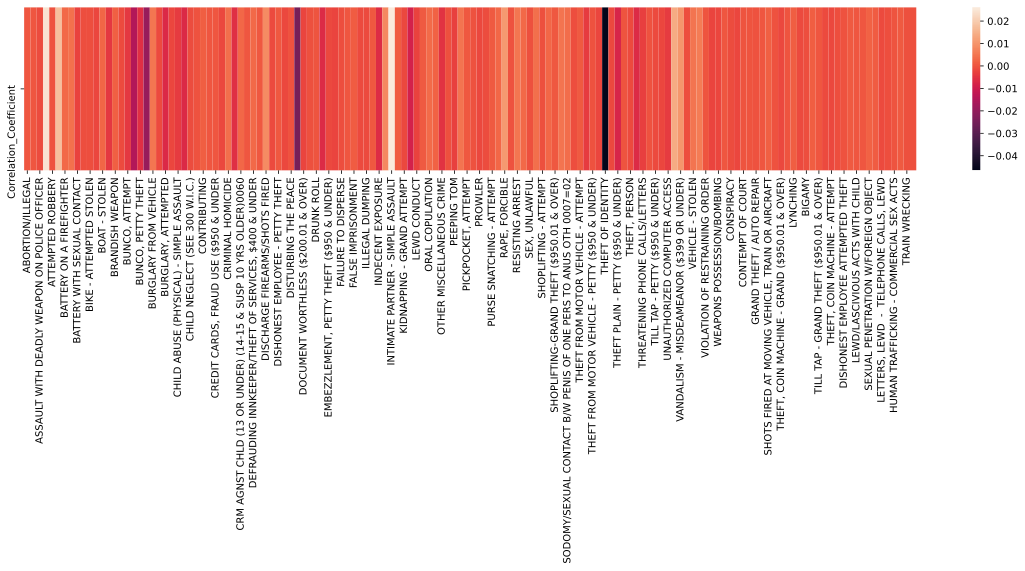

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(correlation_coefficients.transpose())

**4.5. Анализ преступлений в заданном районе: линейный график коэффициент корреляции дня недели и вида преступления в абсолютных значениях.**

Text(0.5, 0, 'Districts')

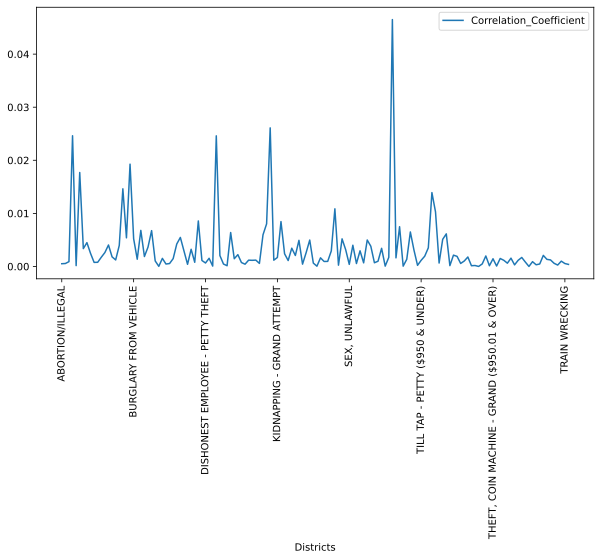

In [33]:
correlation_coefficients = abs(correlation_coefficients) #abcolute values
correlation_coefficients.plot(rot = 90, figsize=(10, 5))
plt.xlabel('Districts')

**5.1. Сравнение количества преступлений по дням недели и районам: построить линейный график для трех любых районов;**

In [34]:
#here I manually created three different traces to make plots
#here we can use dataframe from task2
day1 = 'Monday'
day2 = 'Thursday'
day3 = 'Saturday'
trace0 = go.Scatter(x=df_task2.index, y=df_task2[day1], name=day1)
trace1 = go.Scatter(x=df_task2.index, y=df_task2[day2], name=day2)
trace2 = go.Scatter(x=df_task2.index, y=df_task2[day3], name=day3)

data = [trace0, trace1, trace2]
layout = {'title': 'Crimes by districts on ' + day1 + 's, ' + day2 + 's, ' + day3 + 's'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**5.2. Сравнение количества преступлений по дням недели и районам: построить линейный график для всех районов сразу.**

In [35]:
traces_5_2 = []
for i in df_task2.columns:
    traces_5_2.append(go.Scatter(x=df_task2.index, y=df_task2[i], name=i))
    
layout_5_2 = {'title': 'Crimes by districts on dependin on days of week'}

fig_5_2 = go.Figure(data=traces_5_2, layout=layout_5_2)

iplot(fig_5_2, show_link=False)

**6.1. Доля преступлений в конкретном районе от общего количества: Bar график для всех районов по всей статистикe;**

In [36]:
#crete new dataframe with amount of crimes on each street and then calculate it's share of total amount
df_task6 = pd.DataFrame(la_crimes['Area Name'].value_counts())
df_task6.rename(columns={'Area Name' : 'Amount_Of_Crimes'}, inplace = True)
total = df_task6['Amount_Of_Crimes'].sum()
df_task6['Percentage_Of_Total_Amount'] = df_task6['Amount_Of_Crimes'] * 100 / total
df_task6

,Amount_Of_Crimes,Percentage_Of_Total_Amount
77th Street,117760,6.959581
Southwest,109185,6.452801
N Hollywood,92011,5.437822
Pacific,89375,5.282036
Southeast,89061,5.263478
Mission,85207,5.035708
Northeast,81355,4.808056
Van Nuys,80618,4.764500
Newton,79565,4.702268
Devonshire,78789,4.656406


In [37]:
#plot data
fig_6_1 = go.Figure(data=go.Bar(x=df_task6.index, y=df_task6['Percentage_Of_Total_Amount'], name=i),
                    layout={'title': 'Percentage of crimes in each district of total crimes in LA'})
iplot(fig_6_1, show_link=False) 

**6.2. Доля преступлений в конкретном районе от общего количества: Bar график для всех районов по годам.**

In [38]:
#we will use dataframe from task3
df_task6_2 = df_task3.transpose()
df_task6_2

Full_Time_Occurred,2010,2011,2012,2013,2014,2015,2016,2017,2018
Area Name,,,,,,,,,
77th Street,14413,14220,14254,13696,14006,14572,15313,15338,1948
Central,7136,7162,8071,7574,8352,10257,10812,11836,1625
Devonshire,10603,9612,9392,8637,8602,9982,10283,10501,1177
Foothill,9303,8481,7898,7446,7091,7652,7865,8028,1068
Harbor,9561,9815,9402,8387,8262,9486,9488,9591,1211
Hollenbeck,7377,6519,7052,6681,6883,7980,9116,8933,1230
Mission,10525,10501,10532,10231,9879,10572,10955,10671,1341
N Hollywood,11334,10672,11235,10896,10346,11739,11971,12243,1575
Newton,9967,9328,8864,8598,9179,9601,10978,11622,1428


In [39]:
#now in dataframe we show percentage of crimes in each district in each year to total crimes that year
for col in df_task6_2.columns:
    df_task6_2[col] = df_task6_2[col] * 100 / df_task6_2[col].sum()
df_task6_2

Full_Time_Occurred,2010,2011,2012,2013,2014,2015,2016,2017,2018
Area Name,,,,,,,,,
77th Street,6.908138,7.100769,7.095107,7.137237,7.195886,6.802003,6.844135,6.718000,6.616174
Central,3.420278,3.576351,4.017442,3.946950,4.291021,4.787822,4.832416,5.184134,5.519139
Devonshire,5.082008,4.799760,4.674986,4.500899,4.419464,4.659456,4.595980,4.599408,3.997555
Foothill,4.458919,4.234995,3.931329,3.880247,3.643155,3.571845,3.515257,3.516241,3.627348
Harbor,4.582578,4.901129,4.679964,4.370619,4.244781,4.427931,4.240655,4.200830,4.113032
Hollenbeck,3.535789,3.255268,3.510222,3.481591,3.536290,3.724951,4.074390,3.912628,4.177563
Mission,5.044623,5.243683,5.242435,5.331562,5.075550,4.934860,4.896330,4.673867,4.554563
N Hollywood,5.432376,5.329072,5.592362,5.678105,5.315481,5.479599,5.350431,5.362399,5.349319
Newton,4.777174,4.657945,4.412167,4.480575,4.715910,4.481611,4.906610,5.090403,4.850049


In [40]:
traces_6_2 = []
for i in df_task6_2.index:
    traces_6_2.append(go.Bar(x=df_task6_2.columns, y=df_task6_2.loc[i], name=i))  
layout_6_2 = {'title': 'Percentage of crimes in each district to total amount of crimes in LA each year'}
fig_6_2 = go.Figure(data=traces_6_2, layout=layout_6_2)
iplot(fig_6_2, show_link=False)

**7. box график статистики всех преступлений в распределении по годам.**

In [41]:
#we will use dataframe from task3
data7 = []
for i in df_task3.index:
    data7.append(go.Box(y=df_task3.loc[i], name=i))   
iplot(data7, show_link = False)

**8.1. Интерактивный график: количество преступлений от дня недели для отдельного района;**

In [42]:
#here we use transposed dataframe from task2
df_task8 = df_task2.transpose()
traces8_1 = []
for district in df_task8.columns:
    traces8_1.append(
        go.Scatter(
            x=df_task8[district].index,
            y=df_task8[district].values,
            name = district, 
            visible = (district == '77th Street'))
    )
#we add buttons in cycle to avoid code duplication    
buttons8_1 = []
counter = 0
for i in df_task8.columns:
    buttons8_1.append(dict(
        args=['visible', [False]*counter + [True] + [False]*(len(df_task8.columns)-1)],
        label=i, 
        method='restyle'
    ))
    counter += 1
layout8 = go.Layout(title='Amount of crimes by day of week in each district', 
                   updatemenus=list([dict(x=-0.05, y=1, yanchor='top', buttons=buttons8_1)]))

fig_8_1 = {'data': traces8_1, 'layout': layout8}
iplot(fig_8_1, show_link=False)

**8.2. Интерактивный график: количество преступлений от района для отдельного дня недели.**

In [43]:
#here we use dataframe from task2
traces8_2 = []
for day in df_task2.columns:
    traces8_2.append(
        go.Scatter(
            x=df_task2[day].index,
            y=df_task2[day].values,
            name = day, 
            visible = (day == 'Monday'))
    )
#we add buttons in cycle to avoid code duplication    
buttons8_2 = []
counter = 0
for i in df_task2.columns:
    buttons8_2.append(dict(
        args=['visible', [False]*counter + [True] + [False]*(len(df_task2.columns)-1)],
        label=i, 
        method='restyle'
    ))
    counter += 1
layout8_2 = go.Layout(title='Amount of crimes by district on each day of week', 
                   updatemenus=list([dict(x=-0.05, y=1, yanchor='top', buttons=buttons8_2)]))

fig_8_2 = {'data': traces8_2, 'layout': layout8_2}
iplot(fig_8_2, show_link=False)